In [1]:
import pandas as pd
from fbprophet import Prophet # pip install -i https://pypi.tuna.tsinghua.edu.cn/simple fbprophet 

In [2]:
raw_data = pd.read_csv('Desktop/Python/time series/retention_fcst.csv')

In [3]:
raw_data['dates'] = pd.to_datetime(raw_data['dates'])
raw_data['retention_rate'] = raw_data['retention_rate'].astype('float64')

In [4]:
raw_data.tail()

,dates,retention_rate
145,2018-06-26,0.64
146,2018-06-27,0.65
147,2018-06-28,0.65
148,2018-06-29,0.66
149,2018-06-30,0.67


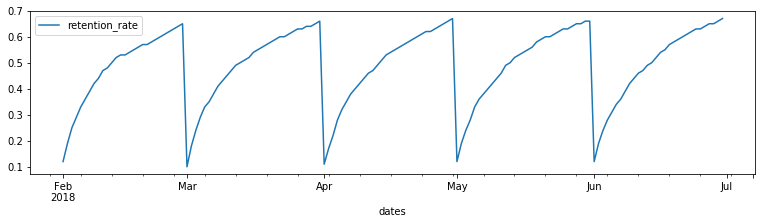

In [5]:
# plot the data to take a look
df = raw_data.set_index('dates')
df.plot(figsize=(13, 3))

In [11]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
dates             150 non-null datetime64[ns]
retention_rate    150 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 KB


In [14]:
raw_data.columns = ['ds','y']

In [15]:
m = Prophet()
m.fit(raw_data)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/gaoziyao/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [16]:
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
175,2018-07-26
176,2018-07-27
177,2018-07-28
178,2018-07-29
179,2018-07-30


In [17]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
175,2018-07-26,0.556325,0.383714,0.737046
176,2018-07-27,0.552674,0.375076,0.721881
177,2018-07-28,0.576751,0.385981,0.765436
178,2018-07-29,0.562950,0.381122,0.737547
179,2018-07-30,0.582460,0.404147,0.778794


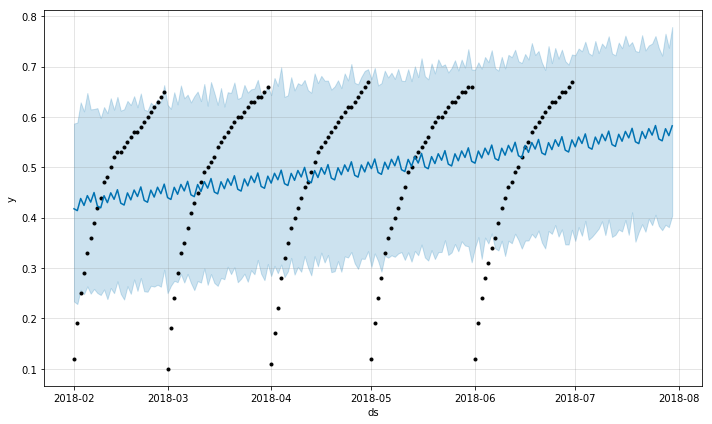

In [18]:
fig1 = m.plot(forecast)

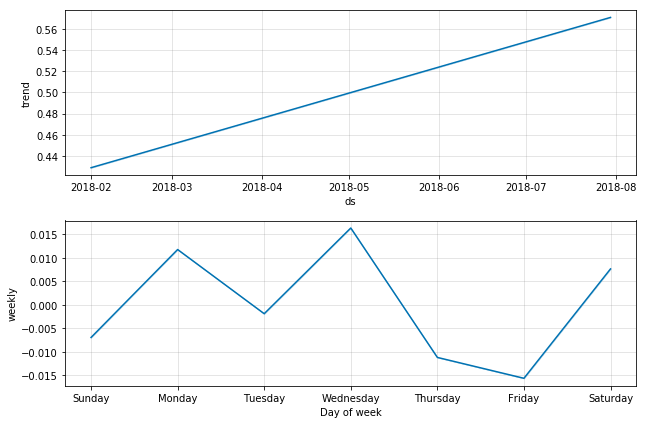

In [19]:
fig2 = m.plot_components(forecast)

In [23]:
forecast[-30:]

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yhat
150,2018-07-01,0.547733,0.547733,0.547733,0.353833,0.722679,-0.006961,-0.006961,-0.006961,0.0,0.0,0.0,-0.006961,-0.006961,-0.006961,0.540773
151,2018-07-02,0.548525,0.548525,0.548525,0.381233,0.736006,0.011758,0.011758,0.011758,0.0,0.0,0.0,0.011758,0.011758,0.011758,0.560283
152,2018-07-03,0.549318,0.549318,0.549318,0.364055,0.730552,-0.001905,-0.001905,-0.001905,0.0,0.0,0.0,-0.001905,-0.001905,-0.001905,0.547413
153,2018-07-04,0.550110,0.550110,0.550110,0.393757,0.749581,0.016338,0.016338,0.016338,0.0,0.0,0.0,0.016338,0.016338,0.016338,0.566447
154,2018-07-05,0.550902,0.550902,0.550902,0.356109,0.726978,-0.011209,-0.011209,-0.011209,0.0,0.0,0.0,-0.011209,-0.011209,-0.011209,0.539692
155,2018-07-06,0.551694,0.551694,0.551694,0.361981,0.722202,-0.015653,-0.015653,-0.015653,0.0,0.0,0.0,-0.015653,-0.015653,-0.015653,0.536041
156,2018-07-07,0.552486,0.552486,0.552486,0.369872,0.751055,0.007632,0.007632,0.007632,0.0,0.0,0.0,0.007632,0.007632,0.007632,0.560118
157,2018-07-08,0.553278,0.553278,0.553278,0.378287,0.726833,-0.006961,-0.006961,-0.006961,0.0,0.0,0.0,-0.006961,-0.006961,-0.006961,0.546317
158,2018-07-09,0.554070,0.554070,0.554070,0.392859,0.745918,0.011758,0.011758,0.011758,0.0,0.0,0.0,0.011758,0.011758,0.011758,0.565828
159,2018-07-10,0.554862,0.554862,0.554862,0.365360,0.737467,-0.001905,-0.001905,-0.001905,0.0,0.0,0.0,-0.001905,-0.001905,-0.001905,0.552957
